## Lab 12

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from skimage import data, exposure

import pandas as pd

In [3]:
input_path_horses = './DataSets/horse-or-human/train/horses'
input_path_humans = './DataSets/horse-or-human/train/humans'
files_horses = os.listdir(f'{input_path_horses}')
files_humans = os.listdir(f'{input_path_humans}')
image = cv2. imread(f'{input_path_horses}/{files_horses[25]}')

In [4]:
image.shape

(300, 300, 3)

In [5]:
def img2hog(image):
    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(4, 4),
        block_norm= 'L2',
        visualize=True
        )
    
    return fd, hog_image

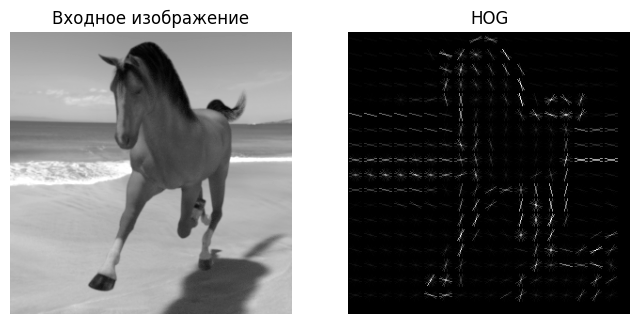

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(
    gray,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(4, 4),
    visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1. imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Входное изображение')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 20))

ax2.axis('off')
ax2. imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')
plt. show()


In [7]:
images1 = list()
images2 = list()
for file in files_horses:
    images1.append(cv2.imread(f'{input_path_horses}/{file}'))
for file in files_humans:
    images2.append(cv2.imread(f'{input_path_humans}/{file}'))
images = images1 + images2

In [8]:
hog_images = []
hog_features = []
for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (300, 150), interpolation = cv2.INTER_AREA)
    fd, hog_image = img2hog(resized)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [10]:
labels1 = [1 for i in range(500)]
labels2 = [0 for i in range(527)]
hog_features = np.array(hog_features)
labels = np.array(labels1+labels2).reshape(1027,1)
data_frame = np.hstack((hog_features,labels))
np.random. shuffle(data_frame)

In [17]:
clf = svm.SVC()
percentage = 80
partition = int(len(hog_features)*percentage/100)

x_train, x_test = data_frame[:partition, :- 1], data_frame[partition:, :- 1]
y_train, y_test = data_frame[:partition, -1: ].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

c:\Users\UAZS8\Desktop\PYTHON\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [19]:
y_pred = clf.predict(x_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))

Accuracy: 0.9927007299270073
